In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold, cross_val_score

# Homework 5

<strong>Name: </strong> Kennon Stewart

<strong>Email: </strong> ksstewar@umich.edu

## Question 1

We will now derive the probability that an observation is within the bootstrap sample of sample size $n$.

### Part A

What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

The event that the first bootstrap observation is not the jth observation from the original sample is the complement of the event where the first observation is the jth observation in the original sample.

$$
1 - P(B)
$$

where B is the event where the 1st observation is the jth sample observation. Since $P(B)=\frac{1}{n}$, we have $1-(\frac{1}{n})$.

### Part B

Similar to the response to Part A, the probability that the second bootstrap observation is not the jth sample observation is $1-(\frac{1}{n})$.

### Part C

Since the bootstrap samples the original sample with replacement, each element in the original sample with sample size $n$ has a $\frac{1}{n}$ chance of being sampled. For an element of the sample to not be selected for a bootstrap sample of n observations would be the product of their individual probabilities due to the independence of draws.

Thus, $P = (1-\frac{1}{n})^n$.

### Part D

When given a sample size $n=5$, we can plug the sample size into our answer to the previous question to find the probability that a sample observation is not included in the bootstrap sample. If $A$ is the event that observation j is not in the bootstrap sample.

$$
P(A)=(1-\frac{1}{5})^5
$$

and the probability in which we're interested, $P(A^{C}) = 1 - P(A) = 0.67232$.

### Part E

When the sample size increases to $n=100$, we do the same as in Part D to get $P(A^{C}) = 1 - P(A) = 0.049$.

### Part F

When the sample size increases to $n=10000$, we do the same as in Part E to get $P(A^{C}) = 1 - P(A) = 0.0004999$.

## Question 2

Suppose we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor of $X$. Carefully describe how we might estimate the standard deviation of our prediction.

The idea would be that we take a large number of bootstrap samples, which are samples drawn with replacement from the original sample. For each of these bootstrap samples, we'd train a new linear model that would be used to make a prediction using the same original predictor values used to generate our observed prediction. The differences between our bootstrap prediction and original prediction are repeatedly summed and averaged across the number of bootstrap samples to estimate a standard deviation. This can be used to draw a confidence interval around the original prediction.

- From the original sample of size $n$, draw a bootstrap sample of size $n$ with replacement.
- Use the bootstrap sample to train a new model.
- Use this boostrap model to make a prediction on the original set of predictors as the first model.
- Repeat steps 1 - 3 until a sufficient amount of sample predictions have been generated and calculate the variance of this new sample of predictions.
- The variance of the estimate follows using algebra.


## Question 3

<strong>(a) </strong>I use the following code to initialize a random number generator and generate a normally-distributed dataset of numbers of sample size $n=100$ and $p \sim \text{Normal}(\mu,\sigma^{2})$. We can write out the data's distribution in equation form in order to better understand the data-generating process:

$$
y=x-2x^{2} + \epsilon
$$

where $\epsilon \sim N(\mu, \sigma^{2})$.

<strong>(b) </strong> When I visualize the data using a scatter plot in **Figure 3.1**, I can see that the data follows a parabola pretty closely.

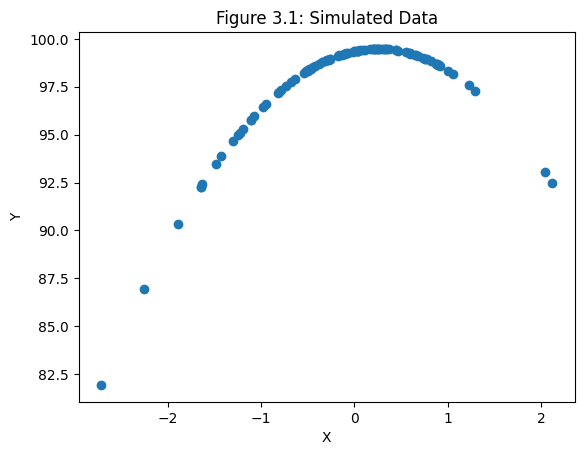

In [2]:
# generate the sample data
rng = np.random.default_rng(1)
x = rng.normal(size = 100)
y = x - 2 * x**2 + rng.normal(100)


# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Figure 3.1: Simulated Data")

# Show the plot
plt.show()


<strong>(c) </strong>Construct 5 folds using `sklearn.model_selection.KFold` where the `random_state` is initialized to 3. Using these folds, compute the cross-validation errors that result from fitting the following four models using least squares. **Use the same five folds for all four models.**

For each fold and each model, report the MSE as well as the model with the smallest MSE. Is this surprising?

**<a href = "https://julien-vitay.net/lecturenotes-neurocomputing/5-exercises/5-Crossvalidation-solution.html">Source for my code.</a>**

<strong>(d) </strong>Consider estimating log-odds using the logistic regression with ridge penalties, setting regularization strength through LOOCV.

<em>True or False:</em> the result will depend on a random seed that we use as part of the LOOCV process. Explain your answer.

In [3]:
folds = KFold(
    n_splits = 5,
    shuffle = True,
    random_state = 3
) # initialize the folds for validation

metrics = {
    "degree" : [],
    "fold" : [],
    "mse" : []
}

for degree in range(5):
    model = np.poly1d(
        np.polyfit(
            x = x,
            y = y,
            deg = degree
        )
    ) # fit the polynomial model of degree i
    for indx, (train_index, test_index) in enumerate(folds.split(x)):
        # isolate the training set
        X_training = x[train_index]
        y_training = y[train_index]

        # get the coefficients
        poly_coefficients = np.polyfit(
            x[train_index],
            y[train_index],
            deg = degree
        )

        # initialize the model
        poly_model = np.poly1d(poly_coefficients)

        # generate predicted values
        y_predicted = poly_model(X_training)

        # report the MSE
        fold_mse = np.mean([(x - y)**2 for x, y in zip(y_predicted, y_training)])
        print(f"MSE for degree {degree} fold {indx}: " + str(fold_mse))

        # log the metrics
        metrics["degree"].append(degree)
        metrics["fold"].append(indx)
        metrics["mse"].append(fold_mse)
        


MSE for degree 0 fold 0: 7.816284760165237
MSE for degree 0 fold 1: 8.8380326424855
MSE for degree 0 fold 2: 7.5093725964044635
MSE for degree 0 fold 3: 8.570532395349716
MSE for degree 0 fold 4: 6.062291139638938
MSE for degree 1 fold 0: 5.527484467468671
MSE for degree 1 fold 1: 4.615058867791548
MSE for degree 1 fold 2: 5.126249368692131
MSE for degree 1 fold 3: 4.835032117574711
MSE for degree 1 fold 4: 4.140356919628905
MSE for degree 2 fold 0: 6.636529023443328e-27
MSE for degree 2 fold 1: 1.8932661725304283e-27
MSE for degree 2 fold 2: 6.977316934498805e-27
MSE for degree 2 fold 3: 7.295385651483917e-28
MSE for degree 2 fold 4: 5.5813486766197026e-27
MSE for degree 3 fold 0: 2.2012374699287114e-27
MSE for degree 3 fold 1: 5.6495062588307984e-27
MSE for degree 3 fold 2: 3.291758785306238e-27
MSE for degree 3 fold 3: 2.9661170036310044e-27
MSE for degree 3 fold 4: 2.027056982055912e-27
MSE for degree 4 fold 0: 1.7266587493477508e-27
MSE for degree 4 fold 1: 1.3833464833955662e-27


The lowest MSE seems to come from the polynomial with degree 4. This makes sense because there is almost no variation in this data, and so overfitting to the training set would implicitly mean fitting to the test set, as well. Since the training and test data were generated using the sama data-generating process, with a minimum of variance, it wouldn't be difficult for the model to impute the missing values.

## Question 6

For question 6, my first step is to download the dataset from Canvas and use it to train a Logistic Regression classifier. Since I won't be using the K-Fold Cross-Validation method for the first iteration of the model, I would expect the classification error to be smaller than that of the naive classifier (50%), but still somewhat large.

In [4]:
file_path = "weekly.csv"
weekly_data = pd.read_csv(file_path, index_col = 0)

In [5]:
weekly_data = weekly_data[["Lag1", "Lag2", "Direction"]]

In [6]:
# create training and testing sets
X_training = weekly_data[["Lag1", "Lag2"]]
y_training = weekly_data["Direction"]

# initialize the logistic regression
logistic_regression_model = LogisticRegression()

# fit the model
logistic_regression_model.fit(X_training, y_training)

# generate predictions
predictions = logistic_regression_model.predict(X_training)

# evaluate the performance
misclassifications = np.mean([1 if x == y else 0 for x, y in zip(y_training, predictions)])

print(misclassifications)


0.5546372819100092


### Part B

The second iteration of the model is done using a single holdout from the training set to serve as the validation set. We notice that the misclassification rate of the classifier trained on the entire training set is very similar to that of the classifier when trained on a training set of size $n-1$. 

In [11]:
# create training and testing sets
X_holdout = weekly_data[["Lag1", "Lag2"]].iloc[[1]]
y_holdout = weekly_data["Direction"].iloc[[1]]
X_training = weekly_data[["Lag1", "Lag2"]].iloc[1:]
y_training = weekly_data["Direction"].iloc[1:]


# initialize the logistic regression
logistic_regression_model = LogisticRegression()

# fit the model
logistic_regression_model.fit(X_training, y_training)

# generate predictions
predictions = logistic_regression_model.predict(X_training)

# evaluate the performance
misclassifications = np.mean([1 if x == y else 0 for x, y in zip(y_training, predictions)])

print(misclassifications)


0.5569852941176471


### Part C

When we use the model from <strong>(b)</strong> to do inference on the held out observation, we see that the classifier correctly identifies the held-out observation. This makes sense since there's more than enough data that was apart of the training set to properly classify the unseen observation.

In [15]:
# generate predictions
predictions = logistic_regression_model.predict(X_holdout)

# evaluate the performance
misclassifications = np.mean([1 if x == y else 0 for x, y in zip(y_holdout, predictions)])

misclassifications

np.float64(0.0)

In [50]:
def loocv(n):
    results = []

    for i in range(n):

        # define the left-out observation
        X_holdout, y_holdout = weekly_data[["Lag1", "Lag2"]].iloc[[i]], weekly_data.at[i, "Direction"]

        # define the training set
        X_training, y_training = weekly_data[["Lag1", "Lag2"]].drop(i, axis = 0), weekly_data["Direction"].drop(i, axis = 0)

        # initialize the model
        logistic_regression_model = LogisticRegression()

        # fit the model
        logistic_regression_model.fit(X_training, y_training)

        # calculate the predicted value
        holdout_prediction = logistic_regression_model.predict(X_holdout)[0]

        if holdout_prediction == y_holdout:
            results.append(1)
        else:
            results.append(0)
    return float(np.mean(results))

### Part E

When we average the accuracy of our simulation runs, we see that the accuracy of our model using LOOCV is slightly higher than that estimated using the whole training set. And I have much more confidence in this estimate because it was generated using every possible permutation of the dataset for training and validation.

In [52]:
loocv_mean = loocv(len(weekly_data))
print(loocv_mean)

0.5500459136822773
